<div style="padding: 15px; border: 5px solid transparent; border-color: transparent; margin-bottom: 20px; border-radius: 4px; color: #3c763d; background-color: #dff0d8; border-color: #d6e9c6; font-weight: bold;">
    <br><br>
    <div style="font-weight: bold; font-size: 40px">인공지능 윤리</div>
    <div style="font-weight: bold; font-size: 20px">[08] 안전하고 신뢰할 수 있는 인공지능(심화)</div>
    <hr style="width:80%;text-align:left;margin-left:0;border:0.5px solid green">
    <활동 목표>
        <br>안전한 인공지능을 만들기 위해 신뢰성을 높일 수 있다.<br><br>
        [활동 1] 교통표지판 인식 정확도 높이기<br>
        [활동 2] 파이썬을 활용하여 교통표지판 인식 모델 구현하기<br>
</div>

<div style="padding: 15px; border: 5px solid transparent; border-color: transparent; margin-bottom: 20px; border-radius: 4px; color: #3c763d; border-color: #d6e9c6; font-weight: bold;"><h2 style='font-weight: bold'>2. 파이썬을 활용하여
교통표지판 인식 모델 구현하기</h2></div>

## 1. 필요한 모듈 임포트하기

파이썬에서 CNN 모델을 이용한 딥러닝 처리를 위해 keras 등 관련 모듈이 필요합니다.

다음 코드 셀을 실행시켜 모듈을 불러옵니다.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
import os
import pathlib
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img, load_img, ImageDataGenerator

2023-12-01 07:42:24.736173: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-01 07:42:24.764427: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## 2. 파일 경로 설정

파일 경로를 설정하고 클래스를 확인합니다.

In [2]:
# 경로 설정
train_dir = pathlib.Path('../8차시_data2/train')
validation_dir = pathlib.Path('../8차시_data2/validation')

In [3]:
# 클래스 수 확인
NUM_CLASS = _________________
print(NUM_CLASS)

# 클래스 이름 확인
_________________

4


['3', '0', '2', '1']

클래스를 확인하였을 때, '.ipynb.checkpoints'가 있다면 아래 코드를 실행하여 삭제를 한 후 확인합니다.

In [22]:
# 클래스가 하나 더 많다면 .ipynb.checkpoints 삭제해야 함
import shutil

shutil.rmtree('../8차시_data2/train/.ipynb_checkpoints')
shutil.rmtree('../8차시_data2/validation/.ipynb_checkpoints')

In [23]:
# 클래스 수 확인
NUM_CLASS = len(os.listdir(train_dir))
print(NUM_CLASS)

# 클래스 이름 확인
print(os.listdir(train_dir))

['3', '0', '2', '1']

## 3. 교통표지판 시각화

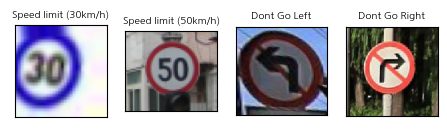

In [4]:
img_dir = pathlib.Path('../8차시_data2/train')
plt.figure(figsize=(14,14))
index=0

# 클래스 이름 
classes = { 0:'Speed limit (30km/h)',
            1:'Speed limit (50km/h)', 
            2:'Dont Go Left',
            3:'Dont Go Right'}

# 교통표지판 시각화
for i in range(NUM_CLASS):
    plt.subplot(1,10, i+1)
    plt.rc('font', size=6) 
    plt.xticks([]) # 눈금 설정 없음
    plt.yticks([])
    plt.title(classes[i])
    sign = list(img_dir.glob(f'{i}/*'))[0]
    img = mpimg.imread(sign)
    plt.imshow(img)
plt.show()

## 4. 이미지 데이터 전처리



처음에는 데이터 증식을 하지 않고 학습시키고, 두번째에 데이터 증식을 한 후 학습시켜 비교해봅니다.

1) 데이터 증식 안하는 경우

In [5]:
# ImageDataGenerator() : 특정 폴더에서 이미지를 가져오기
train_datagen = ImageDataGenerator(rescale = 1/255)           #데이터의 픽셀 범위를 0과 1사이로 스케일링                     
validation_datagen  = ImageDataGenerator(rescale = 1/255)


# flow_from_directory() : 훈련과 테스트에 사용될 이미지 데이터를 만들기
train_generator = train_datagen._________________(train_dir,              # 학습데이터 경로
                                                  batch_size=20,            # 한번에 20개 이미지 가져온다
                                                  class_mode='_________________', # 다중 분류
                                                  target_size=(150, 150))   # 데이터의 크기
validation_generator =  validation_datagen._________________(validation_dir,
                                                       batch_size=20,
                                                       class_mode  = '_________________',
                                                       target_size = (150, 150))

Found 464 images belonging to 4 classes.
Found 166 images belonging to 4 classes.


2) 데이터 증식 하는 경우

In [5]:
# train data 증식
train_datagen = ImageDataGenerator(_________________)
    
    
# validation data에는 증식을 사용하지 않는다.
validation_datagen  = ImageDataGenerator( rescale = 1.0/255. )


# flow_from_directory() : 훈련과 테스트에 사용될 이미지 데이터를 만들기
train_generator = train_datagen.flow_from_directory(train_dir,              # 학습데이터 경로
                                                  batch_size=20,            # 한번에 20개 이미지 가져온다
                                                  class_mode='categorical', # 다중 분류
                                                  target_size=(150, 150))   # 데이터의 크기
validation_generator =  validation_datagen.flow_from_directory(validation_dir,
                                                       batch_size=20,
                                                       class_mode  = 'categorical',
                                                       target_size = (150, 150))

Found 464 images belonging to 4 classes.
Found 166 images belonging to 4 classes.


## 5. CNN 모델 구현

CNN 모델을 구현해 교통표지판을 분류하는 모델을 만들어봅시다.

In [6]:
# 모델 구성하기
model = tf.keras.models.Sequential([
    tf.keras.layers._________________(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers._________________(2,2),
    tf.keras.layers.Dropout(0,3),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0,3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0,3),
    tf.keras.layers.Dense(_________________, activation='softmax')
])

# 모델 구조 확인
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 74, 74, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 36, 36, 64)        0

## 6. 모델 컴파일

In [7]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics= ['accuracy'])

## 7. 모델 훈련

In [8]:
history = _________________(train_generator, # 학습용 generator 
                    validation_data=validation_generator, # 검증용 generator
                    steps_per_epoch=5, # 한 번의 에포크에서 훈련에 사용할 배치의 개수 지정
                    _________________=50, # 학습량
                    validation_steps=3, # 한 번의 에포크가 끝날 때, 검증에 사용되는 배치의 개수 지정
                    verbose=2) 

Epoch 1/50
5/5 - 4s - loss: 5.0055 - accuracy: 0.3300 - val_loss: 1.4401 - val_accuracy: 0.2833 - 4s/epoch - 814ms/step
Epoch 2/50
5/5 - 3s - loss: 1.4087 - accuracy: 0.3200 - val_loss: 1.4083 - val_accuracy: 0.3333 - 3s/epoch - 653ms/step
Epoch 3/50
5/5 - 3s - loss: 1.1583 - accuracy: 0.4500 - val_loss: 1.2140 - val_accuracy: 0.4333 - 3s/epoch - 632ms/step
Epoch 4/50
5/5 - 3s - loss: 1.1047 - accuracy: 0.3600 - val_loss: 1.0799 - val_accuracy: 0.4000 - 3s/epoch - 639ms/step
Epoch 5/50
5/5 - 3s - loss: 1.0419 - accuracy: 0.4500 - val_loss: 1.1855 - val_accuracy: 0.5833 - 3s/epoch - 629ms/step
Epoch 6/50
5/5 - 3s - loss: 1.1280 - accuracy: 0.5300 - val_loss: 1.1215 - val_accuracy: 0.5167 - 3s/epoch - 641ms/step
Epoch 7/50
5/5 - 3s - loss: 0.9342 - accuracy: 0.6000 - val_loss: 0.9575 - val_accuracy: 0.6333 - 3s/epoch - 640ms/step
Epoch 8/50
5/5 - 3s - loss: 1.0787 - accuracy: 0.4048 - val_loss: 0.9850 - val_accuracy: 0.6000 - 3s/epoch - 565ms/step
Epoch 9/50
5/5 - 3s - loss: 0.9656 - acc

## 8. 모델 평가

In [9]:
# 학습용 데이터
model.evaluate(train_generator)

24/24 [==============================] - 5s 188ms/step - loss: 0.5431 - accuracy: 0.7866


[0.5430595874786377, 0.7866379022598267]

In [10]:
# 검증용 데이터
model.evaluate(validation_generator)

9/9 [==============================] - 1s 113ms/step - loss: 0.6429 - accuracy: 0.8494


[0.6429236531257629, 0.849397599697113]

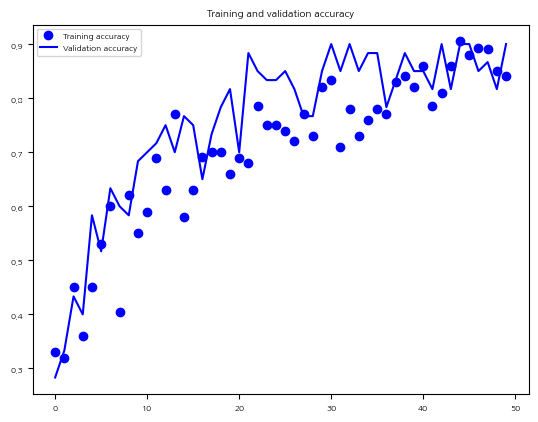

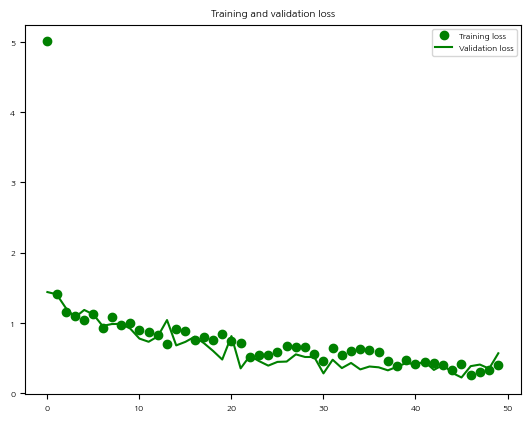

In [11]:
# 정확도 및 손실 시각화

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
#plt.ylim([0.5,1])
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'go', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training and validation loss')
#plt.ylim([0,0.5])
plt.legend()

plt.show()

훈련 정확도가 1.0에 근접한 반면, 테스트의 정확도가 100회 훈려이 끝나도 0.7 수준에 머물고 있다면, 그것은 과적합(overfitting) 현상이다.

## 9. 모델 테스트

테스트할 이미지의 경로를 입력하여 결과를 확인합니다.

※ 주의할 점 
- 이미지 파일의 경로는 '마우스 오른쪽 버튼' - '경로 복사'

- home을 .. 으로 변경
- ex) 'home/사진.png' -> '../사진.png'

### 1) 테스트 이미지 전체 확인

In [ ]:
test_class = {'../8차시_data2/test/01.png':1,'../8차시_data2/test/02.png':1,'../8차시_data2/test/03.png':1,
             '../8차시_data2/test/04.png':1,'../8차시_data2/test/05.png':1,'../8차시_data2/test/06.png':2,
              '../8차시_data2/test/07.png':2,'../8차시_data2/test/08.png':2,'../8차시_data2/test/09.png':3,
              '../8차시_data2/test/10.png':3,'../8차시_data2/test/11.png':3,'../8차시_data2/test/12.jpg':3}

def check_result(inx):
    if inx == 0:
        result='limit30'
    elif inx == 1:
        result='limit50'
    elif inx == 2:
        result='dontgoleft'
    elif inx == 3:
        result='dontgoright'
    return result
        
plt.figure(figsize=(14,14))

for i in range(len(test_class)):
    path = list(test_class.keys())[i]
    img = image.load_img(path, target_size=(150,150))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    prediction = model.predict(images, batch_size=10)
    index = np.argmax(prediction)
 
    if index == list(test_class.values())[i]:
        answer = check_result(index)
        plt.title(f'correct guess : {answer}')
    else:
        answer = check_result(index)
        plt.title(f'wrong guess : {answer}')

    plt.subplot(3,4, i+1)
    plt.rc('font', size=10) 
    plt.xticks([]) # 눈금 설정 없음
    plt.yticks([])
    img2 = mpimg.imread(path)
    plt.imshow(img2)
    
plt.show()

### 2) 이미지 하나씩 업로드해서 확인

In [ ]:
path = '_________________'

# 테스트 과정
img = image.load_img(path, target_size=(150,150))

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])

prediction = _________________(images, batch_size=10)
index = np.argmax(prediction)
answer = check_result(index)
plt.title(f'guess : {answer}')
img_path = mpimg.imread(path)
plt.imshow(img_path)

